# Task #1 

A template code for training an RBM on H$_2$ data for $r = 1.2$ is shown here. Modify this!

Imports and loading in data:

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from RBM_helper import RBM
import H2_energy_calculator
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

onlyfiles = [f for f in listdir("H2_data/") if isfile(join('H2_data/', f)) and '_samples.txt' in f]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
for i in tqdm(   ):
    i+=1

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10000.72it/s]


Train the RBM:

In [62]:
epochs = 500 # number of training steps
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy
r_samples = []
r_true = []
i= 0
for f in tqdm(onlyfiles):
    coeff = np.loadtxt("H2_data/H2_coefficients.txt")[i,:]
    r = float(f.replace('R_','').replace('_samples.txt',''))
    n_vis = 2
    n_hin = 20
    rbm = RBM(n_vis, n_hin)
    training_data = torch.from_numpy(np.loadtxt("H2_data/"+f))
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    #print("True energy: ",true_energy)

    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   
        # now generate samples and calculate the energy 

    # For sampling the RBM, we need to do Gibbs sampling.
    # Initialize the Gibbs sampling chain with init_state as defined below.
    init_state = torch.zeros(num_samples, n_vis)
    RBM_samples = rbm.draw_samples(15, init_state)   

    energies = H2_energy_calculator.energy(RBM_samples.float(), coeff, rbm.wavefunction) 
    #print("Energy from RBM samples: ", energies.item())
    r_samples.append((r, energies.item()))
    r_true.append((r,true_energy))
    i += 1

100%|████████████████████████████████████████████████████████████████████████████████| 54/54 [1:01:27<00:00, 68.28s/it]


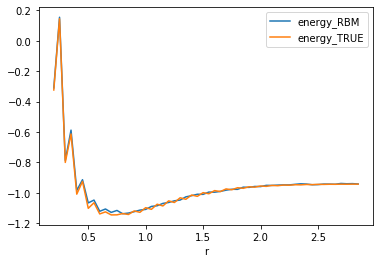

In [63]:
import pandas as pd
pd.concat([pd.DataFrame.from_dict([{'r':s[0],'energy_RBM':s[1]} for s in r_samples]).groupby('r').mean(),
           pd.DataFrame.from_dict([{'r':s[0],'energy_TRUE':s[1]} for s in r_true]).groupby('r').mean()],axis=1).plot()